In [16]:
using PyPlot
using JLD2
include("chern.jl")

Main.chern

# With 4d legs

In [11]:
nqs = 4:2:8
results = chern.testberry(4, 0.2, nqs)

Finished nq = 4. Chern number is -4.5011279573751614e-17
Finished nq = 6. Chern number is -1.9999999999950202
Finished nq = 8. Chern number is -2.000000000206669


3-element Vector{Main.chern.BerryResult}:
 Main.chern.BerryResult(4, -4.5011279573751614e-17, [[1.7843919971609359e-16 3.397502524295791e-16 -1.3511237636837652e-16 0.9999999999999999;;; 3.874963944128523e-17 -2.641679294886889e-16 1.0 1.599390829910892e-17;;; 0.9999999999999997 -1.320545325584618e-16 -1.1077891013691768e-16 -2.0222838552986688e-16;;; 1.2305642206280951e-16 1.0000000000000009 -3.239939326577052e-16 2.096805169137124e-16], [5.0173770087416935e-15 -2.532570170707132e-16 0.9999999999999974 -6.172184831423163e-16; 4.9424415621454914e-14 6.340193951928538e-14 -3.591991469843829e-16 -2.478985983239374e-16; -5.438457678856875e-14 -7.740795287450516e-15 2.0661627080462237e-16 -1.382327818864464e-16; -2.320648889257646e-14 -1.8768728790897953e-14 -7.108360872994134e-18 -3.6238265048846553e-19;;; -1.3868141725666899e-15 1.0952390118184561e-15 4.3449312373083355e-15 1.0000000000000007; -3.07239245412155e-14 -5.5505138098225167e-14 5.892694388814732e-16 2.932643754594873e-16; 8.14

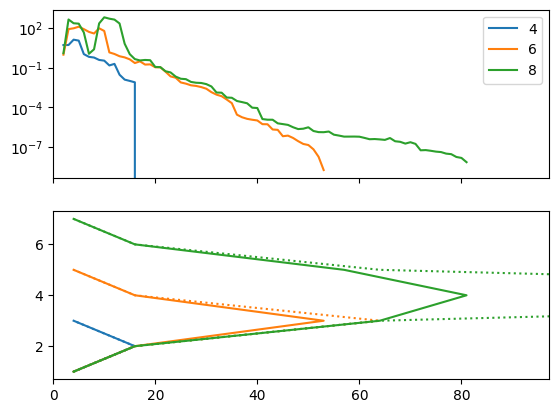

PyObject <matplotlib.legend.Legend object at 0x2a11adac0>

In [12]:
fig, axs = subplots(nrows=2, sharex=true)
for r in results
    nq = r.nq
    axs[1].semilogy(r.ranks, r.errors, label="$nq")
    line = axs[2].plot([min(4^i, 4^(nq - i)) for i in 1:(nq-1)], 1:nq-1, ":")
    axs[2].plot([size(T, 3) for T in r.qtt[1:nq-1]], 1:nq-1, color=line[1].get_color())

    axs[1].set_xlim(0, 1.2 * maximum(r.ranks))
    axs[2].set_xlim(0, 1.2 * maximum(r.ranks))
end
axs[1].legend()

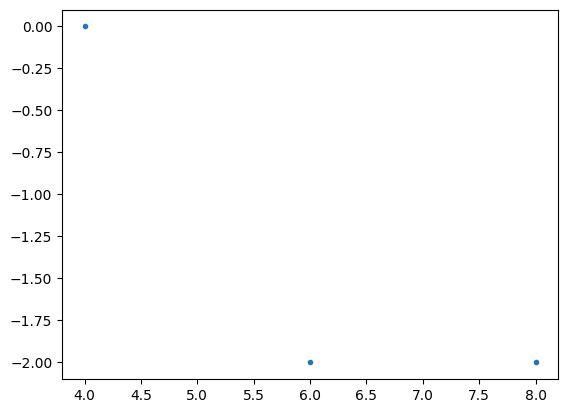

3-element Vector{Float64}:
 -4.5011279573751614e-17
 -1.9999999999950202
 -2.000000000206669

In [13]:
plot([r.nq for r in results], [r.chernnumber for r in results], ".")
[r.chernnumber for r in results]

# With 2 * 2d legs

In [50]:
nqs = [4, 6, 10]
results = [load("chern_results/nq$nq.jld2") for nq in nqs];

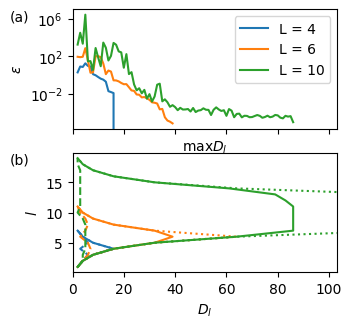

PyObject Text(-45, 0, '(b)')

In [62]:
fig, axs = subplots(nrows=2, sharex=true, figsize=[246/72, 246/72])
for r in results
    nq = r["nq"]
    axs[1].semilogy(r["ranks"], r["errors"], label="L = $nq")
    line = axs[2].plot([min(2^i, 2^(2nq - i)) for i in 1:(2nq-1)], 1:(2nq-1), ":")
    axs[2].plot([size(T, 3) for T in r["qtt"][1:2nq-1]], 1:(2nq-1), color=line[1].get_color())
    axs[2].plot([size(T, 3) for T in r["mps"][1:2nq-1]], 1:(2nq-1), color=line[1].get_color(), "--")

    axs[1].set_xlim(0, 1.2 * maximum(r["ranks"]))
    axs[2].set_xlim(0, 1.2 * maximum(r["ranks"]))
end

axs[1].set_xlabel(L"$\max D_l$")
axs[1].set_ylabel(L"$\epsilon$")
axs[2].set_ylabel(L"$l$")
axs[2].set_xlabel(L"$D_l$")
axs[1].legend()

offsetx = -45
axs[1].annotate(
    "(a)",
    xy=(0, 1),
    xycoords="axes fraction",
    xytext=(offsetx, 0),
    textcoords="offset points",
    verticalalignment="top"
)
axs[2].annotate(
    "(b)",
    xy=(0, 1),
    xycoords="axes fraction",
    xytext=(offsetx, 0),
    textcoords="offset points",
    verticalalignment="top"
)

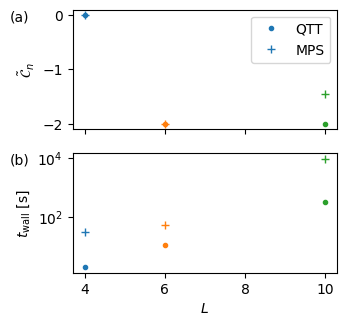

PyObject <matplotlib.legend.Legend object at 0x3f7ae9e50>

In [64]:
fig, axs = subplots(nrows=2, sharex=true, figsize=[246/72, 246/72])
for r in results
    line = axs[1].plot(r["nq"], r["chernnumber"], ".")[1]
    axs[1].plot(r["nq"], r["chernnumbermps"], "+", color=line.get_color())
    # axs[2].semilogy(r["nq"], r["nevals"], ".", color=line.get_color())
    # axs[2].semilogy(r["nq"], r["mpsnevals"], "+", color=line.get_color())
    axs[2].semilogy(r["nq"], r["timeestimate"], ".", color=line.get_color())
    axs[2].semilogy(r["nq"], r["mpstimeestimate"], "+", color=line.get_color())
end

axs[1].set_ylabel(L"$\tilde{\mathcal{C}}_n$")
# axs[2].set_ylabel(L"$N_{\mathrm{eval}}$")
axs[2].set_xlabel(L"$L$")
axs[2].set_ylabel(L"$t_{\mathrm{wall}} ~ [\mathrm{s}]$")

offsetx = -45
axs[1].annotate(
    "(a)",
    xy=(0, 1),
    xycoords="axes fraction",
    xytext=(offsetx, 0),
    textcoords="offset points",
    verticalalignment="top"
)
axs[2].annotate(
    "(b)",
    xy=(0, 1),
    xycoords="axes fraction",
    xytext=(offsetx, 0),
    textcoords="offset points",
    verticalalignment="top"
)

axs[1].legend(("QTT", "MPS"))